In [1]:
from IPython.core.debugger import Tracer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read csv
def get_csv(path,offset_argumented_steering_left = 0.3 ,offset_argumented_steering_center = 0,offset_argumented_steering_right = -0.3):
    # load CSV & drop zeros
    df = pd.read_csv(path+'driving_log.csv')
    df = df.drop(df[df['steering'] == 0.].index)
    df = df.drop(df[df['speed'] < 1.].index)
    df['center'] = path+df['center']
    df['right'] = path+df['right']
    df['left'] = path+df['left']
    df['argumentated_steering_center'] = df['steering'] + offset_argumented_steering_center
    df['argumentated_steering_right' ] = df['steering'] + offset_argumented_steering_right
    df['argumentated_steering_left'  ] = df['steering'] + offset_argumented_steering_left
    return df

c1 =  .7
c2 = 1.2
c3 = 1.8

## manual balaced appearance
tracks = [#get_csv('./track_data/andy_track1_offroad/'),\
          #get_csv('./track_data/andy_track1_offroad2/'),\
          #get_csv('./track_data/andy_track1_exit_correction/'),\
          #get_csv('./track_data/andy_track1_exit_correction/'),\
          #get_csv('./track_data/andy_track1_exit_correction/'),\
          #get_csv('./track_data/data/'),\
          #get_csv('./track_data/peters_drive/'),\
          #get_csv('./track_data/andy_track1_backward/'),\
          #get_csv('./track_data/andy_track1_forward/'),\
          #get_csv('./track_data/andy_track1_exact_drive/'),\
          #get_csv('./track_data/andy_track1_exact_drive2/'),\
          #get_csv('./track_data/andy_track1_exact_drive3/'),\
          #get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          
          get_csv('./track_data/andy_track2_center_forward/'),\
          get_csv('./track_data/andy_track2_left_forward/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_right_forward/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_center_forward/'),\
          get_csv('./track_data/andy_track2_left_forward/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_right_forward/',-c1,-c2,-c3),\

          get_csv('./track_data/andy_track2_center_backward/'),\
          get_csv('./track_data/andy_track2_center_digital_backward/'),\
          
          get_csv('./track_data/andy_track2_shadows/'),\
          get_csv('./track_data/andy_track2_shadows/'),\
          get_csv('./track_data/andy_track2_shadows/'),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          
         ]
df = pd.concat(tracks).reset_index()

def plot_steering(df):
    ### plot 
    cols = ['steering','argumentated_steering_center','argumentated_steering_right','argumentated_steering_left']
    plt.plot(df[cols])
    plt.title('Track Data')
    plt.ylabel('angle')
    plt.xlabel('sampels')
    plt.legend(cols, loc='upper right')
    #plt.yscale('log')
    plt.show()
    
plot_steering(df)
print(df.shape)
df

(62733, 11)


index                                             center  \
0         25  ./track_data/andy_track2_center_forward/IMG/ce...   
1         26  ./track_data/andy_track2_center_forward/IMG/ce...   
2         27  ./track_data/andy_track2_center_forward/IMG/ce...   
3         28  ./track_data/andy_track2_center_forward/IMG/ce...   
4         29  ./track_data/andy_track2_center_forward/IMG/ce...   
5         30  ./track_data/andy_track2_center_forward/IMG/ce...   
6         31  ./track_data/andy_track2_center_forward/IMG/ce...   
7         32  ./track_data/andy_track2_center_forward/IMG/ce...   
8         33  ./track_data/andy_track2_center_forward/IMG/ce...   
9         34  ./track_data/andy_track2_center_forward/IMG/ce...   
10        35  ./track_data/andy_track2_center_forward/IMG/ce...   
11        36  ./track_data/andy_track2_center_forward/IMG/ce...   
12        37  ./track_data/andy_track2_center_forward/IMG/ce...   
13        38  ./track_data/andy_track2_center_forward/IMG/ce...   
14        39  ./track_data/andy_track2_center_forward/IMG/ce...   
15        40  ./track_data/andy_track2_center_forward/IMG/ce...   
16        41  ./track_data/andy_track2_center_forward/IMG/ce...   
17        42  ./track_data/andy_track2_center_forward/IMG/ce...   
18        43  ./track_data/andy_track2_center_forward/IMG/ce...   
19        44  ./track_data/andy_track2_center_forward/IMG/ce...   
20        45  ./track_data/andy_track2_center_forward/IMG/ce...   
21        46  ./track_data/andy_track2_center_forward/IMG/ce...   
22        47  ./track_data/andy_track2_center_forward/IMG/ce...   
23        48  ./track_data/andy_track2_center_forward/IMG/ce...   
24        49  ./track_data/andy_track2_center_forward/IMG/ce...   
25        50  ./track_data/andy_track2_center_forward/IMG/ce...   
26        51  ./track_data/andy_track2_center_forward/IMG/ce...   
27        52  ./track_data/andy_track2_center_forward/IMG/ce...   
28        53  ./track_data/andy_track2_center_forward/IMG/ce...   
29        54  ./track_data/andy_track2_center_forward/IMG/ce...   
...      ...                                                ...   
62703    850  ./track_data/andy_track2_shadows_left/IMG/cent...   
62704    851  ./track_data/andy_track2_shadows_left/IMG/cent...   
62705    852  ./track_data/andy_track2_shadows_left/IMG/cent...   
62706    853  ./track_data/andy_track2_shadows_left/IMG/cent...   
62707    854  ./track_data/andy_track2_shadows_left/IMG/cent...   
62708    855  ./track_data/andy_track2_shadows_left/IMG/cent...   
62709    856  ./track_data/andy_track2_shadows_left/IMG/cent...   
62710    857  ./track_data/andy_track2_shadows_left/IMG/cent...   
62711    858  ./track_data/andy_track2_shadows_left/IMG/cent...   
62712    859  ./track_data/andy_track2_shadows_left/IMG/cent...   
62713    860  ./track_data/andy_track2_shadows_left/IMG/cent...   
62714    861  ./track_data/andy_track2_shadows_left/IMG/cent...   
62715    862  ./track_data/andy_track2_shadows_left/IMG/cent...   
62716    863  ./track_data/andy_track2_shadows_left/IMG/cent...   
62717    864  ./track_data/andy_track2_shadows_left/IMG/cent...   
62718    865  ./track_data/andy_track2_shadows_left/IMG/cent...   
62719    866  ./track_data/andy_track2_shadows_left/IMG/cent...   
62720    867  ./track_data/andy_track2_shadows_left/IMG/cent...   
62721    868  ./track_data/andy_track2_shadows_left/IMG/cent...   
62722    869  ./track_data/andy_track2_shadows_left/IMG/cent...   
62723    870  ./track_data/andy_track2_shadows_left/IMG/cent...   
62724    871  ./track_data/andy_track2_shadows_left/IMG/cent...   
62725    872  ./track_data/andy_track2_shadows_left/IMG/cent...   
62726    873  ./track_data/andy_track2_shadows_left/IMG/cent...   
62727    874  ./track_data/andy_track2_shadows_left/IMG/cent...   
62728    875  ./track_data/andy_track2_shadows_left/IMG/cent...   
62729    876  ./track_data/andy_track2_shadows_left/IMG/cent...   
62730    877  ./track_data/andy_track2_shadows_left/IM

In [3]:
# split data
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=1/11, random_state=42)

In [4]:
# generate argumentated batch
from sklearn.utils import shuffle
import traceback
import sys
from drive import Preprocess

class Batch():
    # argumentation and batching parameters:
    argumentations = 6

    def __init__(self):
        pass

    def fill_batch(self,df,idxes,batch_size_single):
        #try:
        batch_y            = np.empty(list([batch_size_single*self.argumentations]))
        batch_x            = np.empty(list([batch_size_single*self.argumentations]) + list(Preprocess.image_shape))

        idx_b = 0
        cnt = 0
        for idx in idxes:
            #print(df['argumentated_steering_center'].iloc[idx])
            #print([idx])
            batch_y[0+idx_b]         = (df['argumentated_steering_center'].iloc[idx])
            batch_y[1+idx_b]         = (df['argumentated_steering_left'  ].iloc[idx])
            batch_y[2+idx_b]         = (df['argumentated_steering_right' ].iloc[idx])
            batch_x[0+idx_b,:,:,0:3] = (cv2.imread(df['center'].iloc[idx].replace(" ", "").replace("\\", "/")))
            batch_x[1+idx_b,:,:,0:3] = (cv2.imread(df['left'  ].iloc[idx].replace(" ", "").replace("\\", "/")))
            batch_x[2+idx_b,:,:,0:3] = (cv2.imread(df['right' ].iloc[idx].replace(" ", "").replace("\\", "/")))
            batch_x[0+idx_b,:,:]     = Preprocess.preprocess_image(batch_x[0+idx_b,:,:,0:3])
            batch_x[1+idx_b,:,:]     = Preprocess.preprocess_image(batch_x[1+idx_b,:,:,0:3])
            batch_x[2+idx_b,:,:]     = Preprocess.preprocess_image(batch_x[2+idx_b,:,:,0:3])
            # Training only argumentation on HSV Value
            batch_x[0+idx_b,:,:,2]  *= 2*np.random.random()
            batch_x[1+idx_b,:,:,2]  *= 2*np.random.random()
            batch_x[2+idx_b,:,:,2]  *= 2*np.random.random()
            #Add mirrored Version
            batch_y[3+idx_b]      = -batch_y[0+idx_b]
            batch_y[4+idx_b]      = -batch_y[1+idx_b]
            batch_y[5+idx_b]      = -batch_y[2+idx_b]
            batch_x[3+idx_b]      = batch_x[0+idx_b][:,-1::-1]
            batch_x[4+idx_b]      = batch_x[1+idx_b][:,-1::-1]
            batch_x[5+idx_b]      = batch_x[2+idx_b][:,-1::-1]
            idx_b += self.argumentations


        assert(not(np.isnan((np.sum(batch_x))))), 'is nan'
        assert(not(np.isnan((np.sum(batch_y))))), 'is nan'
        cnt +=1
        #return (batch_x,batch_y,weights)
        return (batch_x,batch_y)
        #return shuffle(batch_x,batch_y)


    def get_random_batch(self,df,batch_size_single): 
        n_split   = int(len(df)//batch_size_single)-1
        batch_idx = (df[:batch_size_single*n_split].index.values)   
        batch_idx = shuffle(batch_idx)
        batch_idx = batch_idx.reshape(n_split,batch_size_single,)
        while 1:
            #print('\r\nget_batch: start ',flush=True)
            cnt = 0
            for idxes in batch_idx:
                try:
                    yield (self.fill_batch(df,idxes,batch_size_single))
                except:
                    print("\r\n\r\nUnexpected error: {} \r\n\r\n".format(sys.exc_info()[0]))
                    raise

                    
    def get_stratified_batch(self,df,batch_size_single):
        from sklearn.model_selection import StratifiedShuffleSplit
        random_state=42
        while 1:
            sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=random_state)
            train_index, test_index = next(sss.split(df.index.values.copy(), df['classes']))
            n_split = int(len(train_index)//batch_size_single)-1
            batch_idx = (train_index[:batch_size_single*n_split])   
            batch_idx = shuffle(batch_idx)
            batch_idx = batch_idx.reshape(n_split,batch_size_single,)
            cnt = 0
            for idxes in batch_idx:
                batch_x,batch_y = (self.fill_batch(df,idxes,batch_size_single))
                yield batch_x,batch_y


batch = Batch()

batch_size_single = 6
train_generator = batch.get_random_batch(df=df, batch_size_single=batch_size_single)
validation_generator = batch.get_random_batch(df=df, batch_size_single=batch_size_single)


batch_x,batch_y = next(train_generator)


Using TensorFlow backend.


(36, 160, 320, 6)


steering: 0.3018868, idx: 0


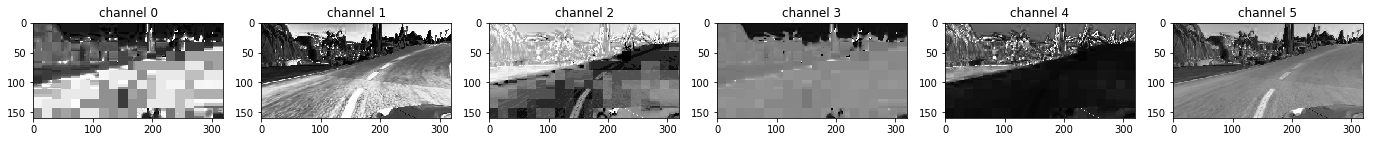

steering: 0.6018867999999999, idx: 1


steering: 0.0018868000000000218, idx: 2


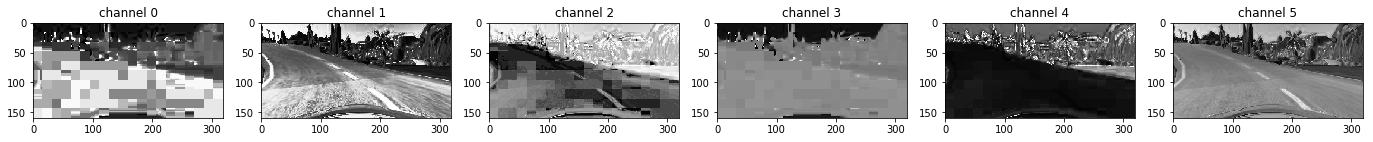

steering: -0.3018868, idx: 3


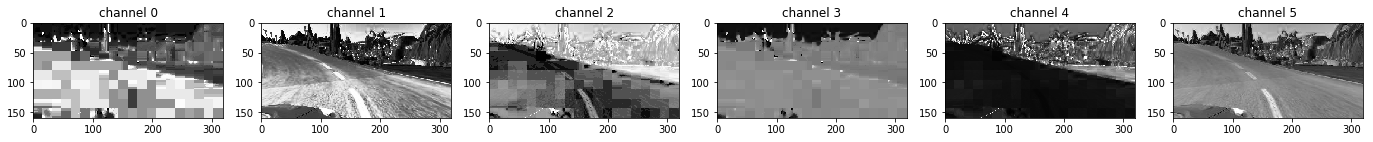

steering: -0.6018867999999999, idx: 4


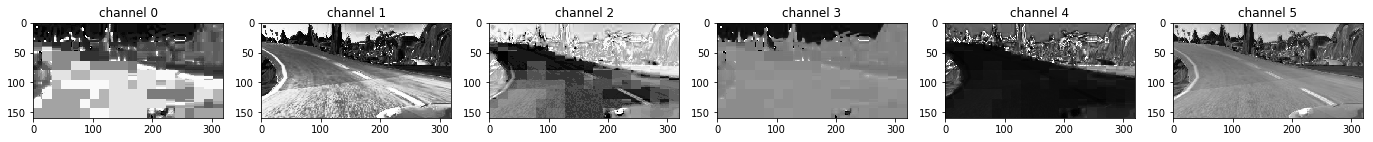

steering: -0.0018868000000000218, idx: 5


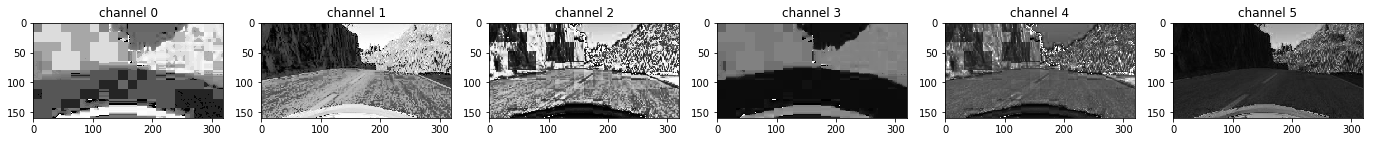

steering: 0.43396229999999997, idx: 6


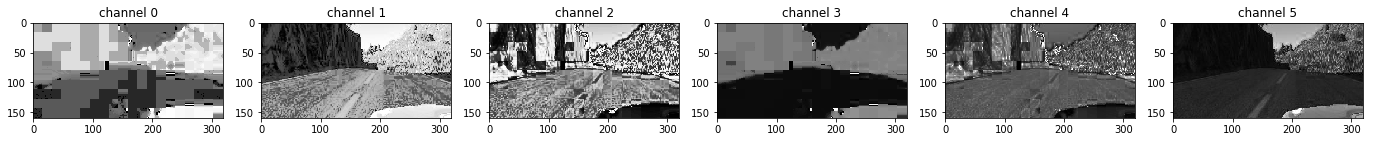

steering: 0.7339623, idx: 7


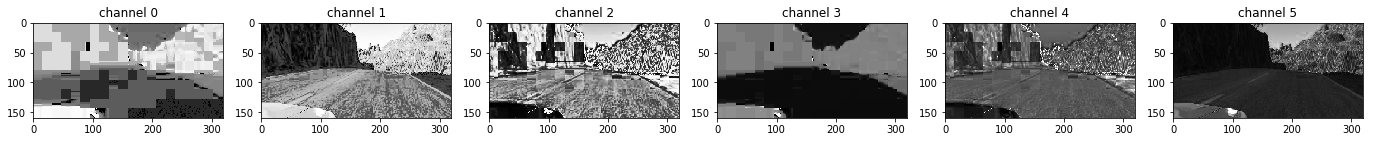

steering: 0.13396229999999998, idx: 8


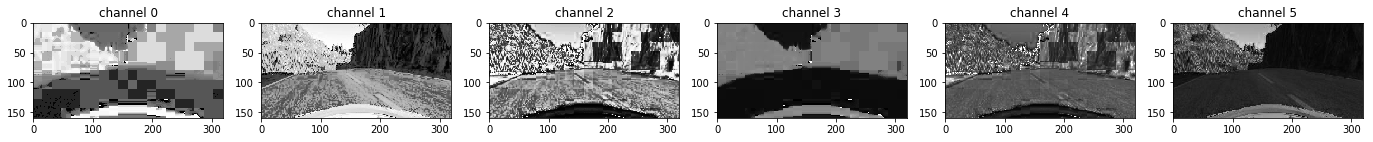

steering: -0.43396229999999997, idx: 9


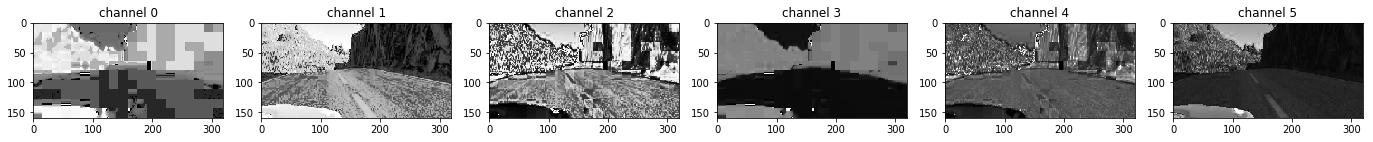

steering: -0.7339623, idx: 10


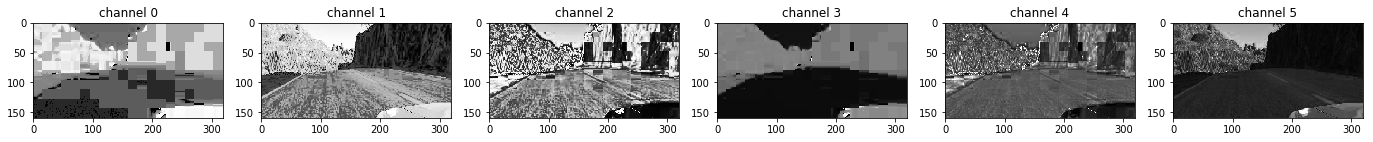

steering: -0.13396229999999998, idx: 11


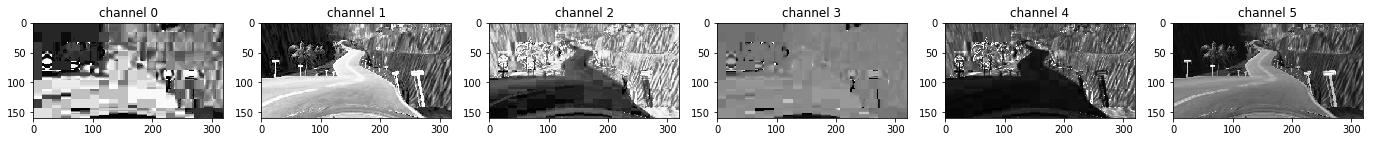

steering: -1.0773584999999999, idx: 12


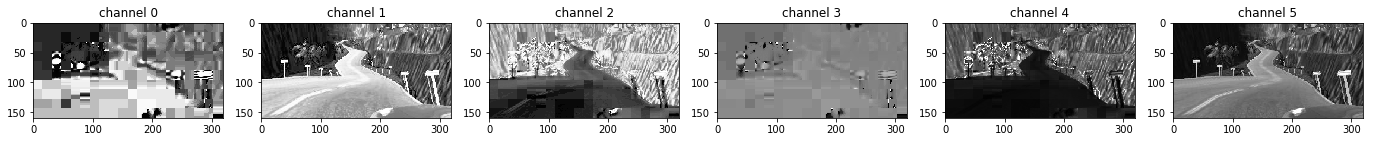

steering: -0.5773585, idx: 13


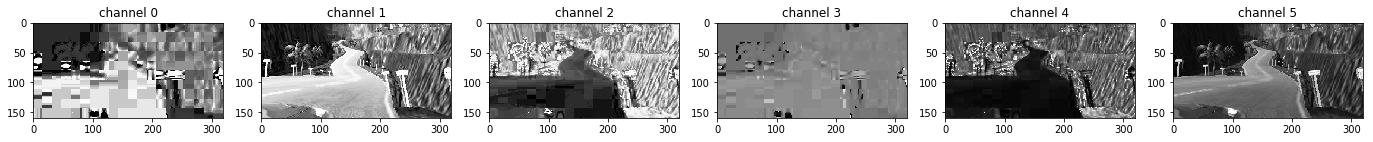

steering: -1.6773585, idx: 14


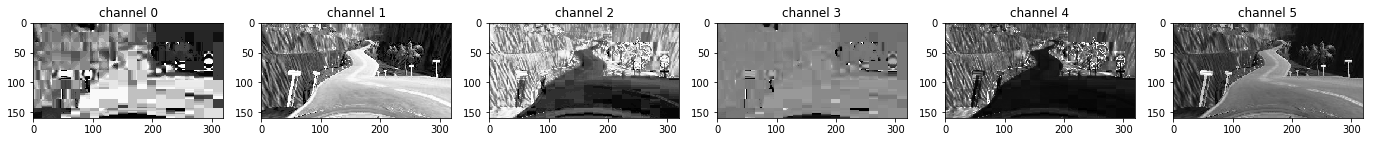

steering: 1.0773584999999999, idx: 15


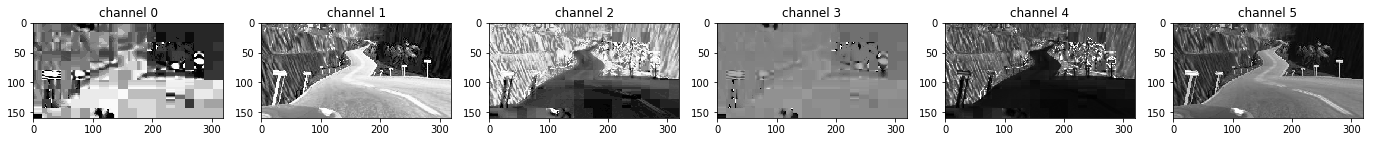

steering: 0.5773585, idx: 16


steering: 1.6773585, idx: 17


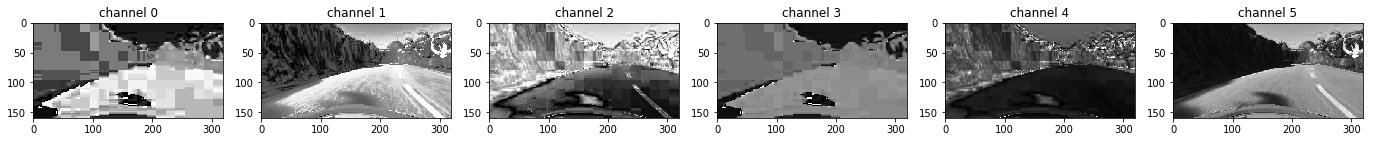

steering: 1.3981132, idx: 18


steering: 1.9981132000000001, idx: 19


steering: 0.8981132, idx: 20


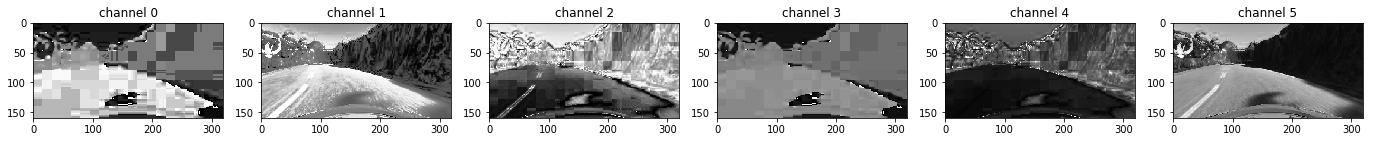

steering: -1.3981132, idx: 21


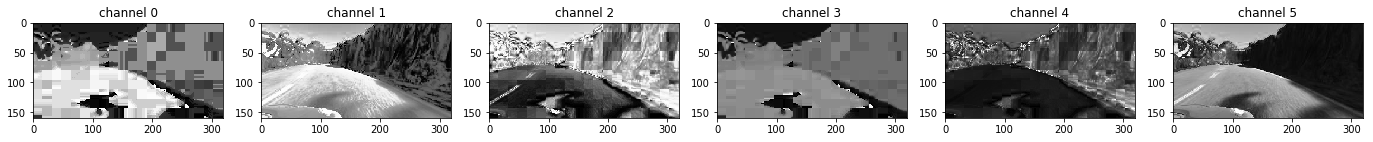

steering: -1.9981132000000001, idx: 22


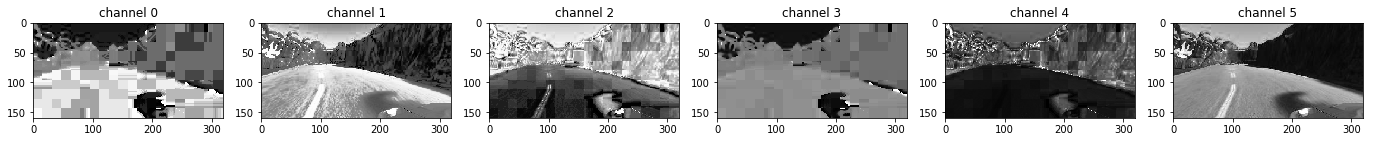

steering: -0.8981132, idx: 23


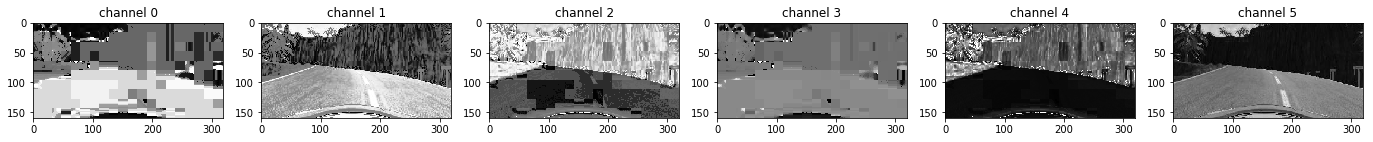

steering: -0.09090909, idx: 24


steering: 0.20909091, idx: 25


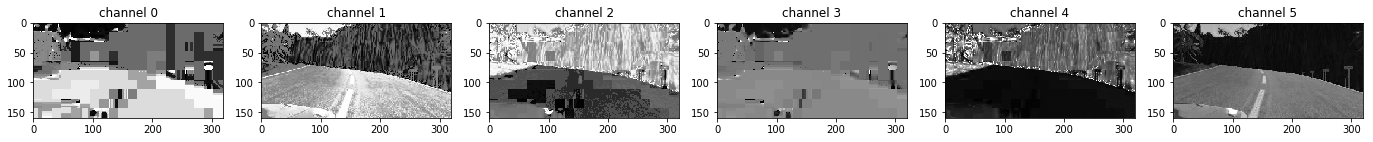

steering: -0.39090908999999996, idx: 26


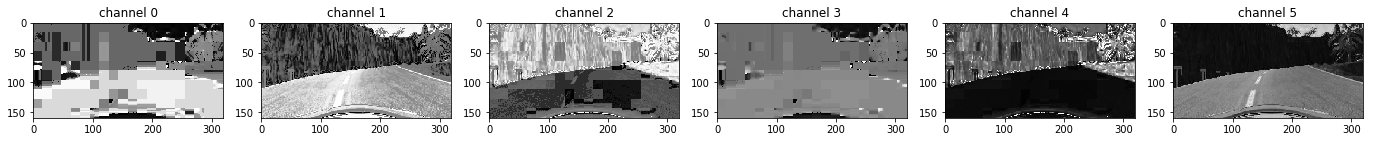

steering: 0.09090909, idx: 27


steering: -0.20909091, idx: 28


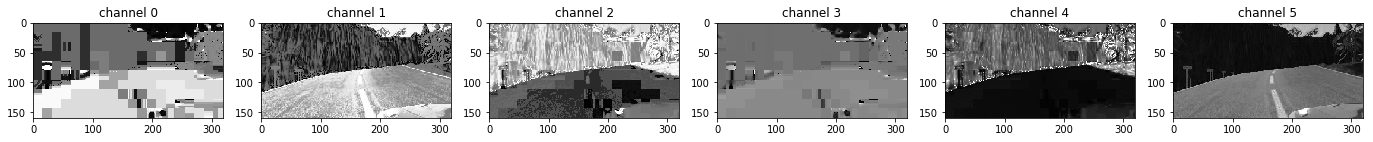

steering: 0.39090908999999996, idx: 29


steering: -0.06060606, idx: 30


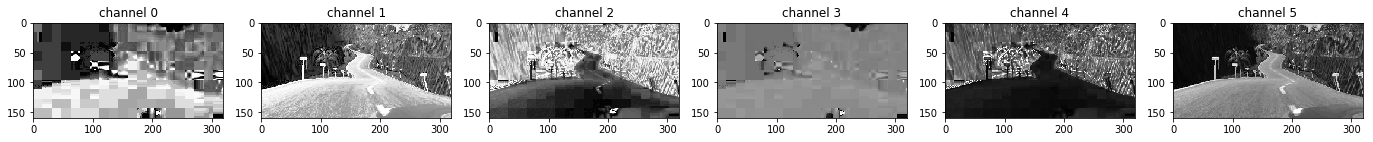

steering: 0.23939393999999997, idx: 31


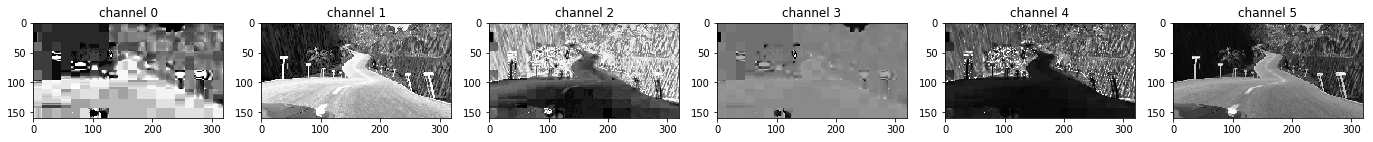

steering: -0.36060606, idx: 32


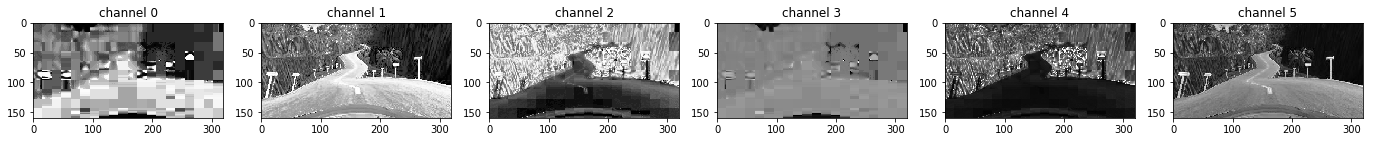

steering: 0.06060606, idx: 33


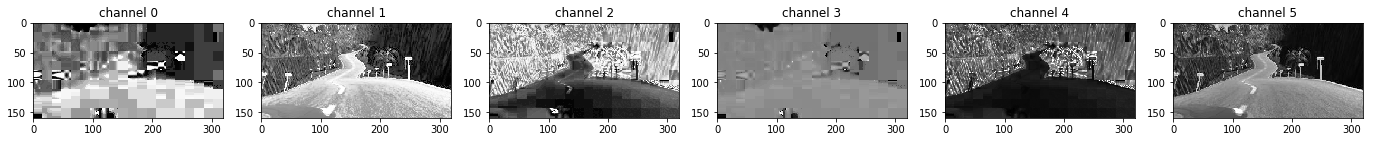

steering: -0.23939393999999997, idx: 34


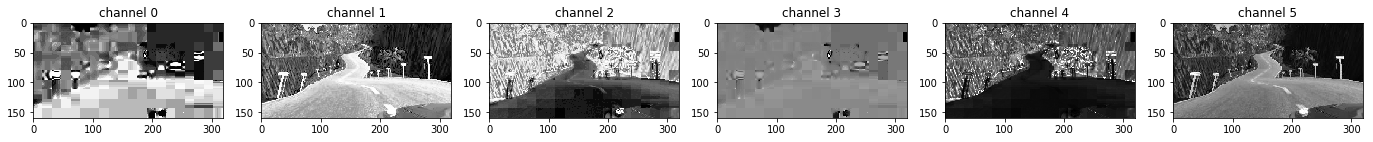

steering: 0.36060606, idx: 35
Wall time: 3min 12s


In [5]:
import matplotlib

def plot_history_objects(history_objects):
    ### print the keys contained in the history object
    #print(history_object.history.keys())
    
    loss = []
    val_loss = []
    for history_object in history_objects:
        loss.extend(history_object.history['loss'])
        val_loss.extend(history_object.history['val_loss'])

    ### plot the training and validation loss for each epoch
    plt.plot(val_loss)
    plt.plot(loss)
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['validation set','training set',], loc='upper right')
    plt.yscale('log')
    plt.show()
    
def plot_history_object(history_object):
    ### print the keys contained in the history object
    print(history_object.history.keys())

    ### plot the training and validation loss for each epoch
    plt.plot(history_object.history['loss'])
    plt.plot(history_object.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.yscale('log')
    plt.show()
        
def visualise_dataset(image,label,steps):
    plt_num = 1
    print(image.shape)
    step_size = int(image.shape[0]/steps)
    for image_idx in range(0,image.shape[0],step_size):
        channels = image.shape[3]
        plt.figure(plt_num, figsize=(32,32))
        for channel in range(channels):
            plt.subplot(4,8, channel+1) # sets the number of feature maps to show on each row and column
            plt.title('channel ' + str(channel)) # displays the feature map number
            plt.imshow(image[image_idx,:,:,channel], interpolation="nearest",cmap="gray") # cmap="gist_earth_r"
        plt.show()
        print('steering: {1}, idx: {0}'.format(image_idx,label[image_idx],))

for _ in range(10):
    batch_x,batch_y = next(train_generator)
    
%time visualise_dataset(batch_x,batch_y,steps=batch_x.shape[0])


In [6]:
from keras.models import Sequential,load_model
from keras.layers.core import Dense, Activation, Dropout, Reshape, Flatten, Lambda
from keras.layers.convolutional import Convolution2D, Cropping2D, SeparableConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Merge
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback, RemoteMonitor

import keras
import tensorflow as tf

# Hyperparameter Compile
loss= 'mse' # 'hinge'
optimizer= keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004) #'Nadam' #'rmsprop'

# Hyperparameter Fit
rounds = 1
n_batches = len(df_train)//batch_size_single

nb_epoch= 6 # n_batches * rounds
batch_size = batch_size_single * 6
patience=5000

print('nb_epoch   \t: {:>5}'.format(nb_epoch))
print('batch_size \t: {:>5}'.format(batch_size))
print('patience   \t: {:>5}'.format(patience))

image_shape = batch_x.shape[1:]

def model_a():
    model = Sequential()
    #model.add(Cropping2D(cropping=((65,23), (0,0)), input_shape=image_shape)) #23
    model.add(Cropping2D(cropping=((33,23), (0,0)), input_shape=image_shape)) #23
    model.add(Lambda(lambda x: x/127.5 - 1.))
    output_shape = ((model.layers[-1].output_shape))
    a = 4 # offset for 2**x exponent)
    model.add(Convolution2D(2**(a+0), 9, 9, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+1), 7, 7, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+2), 5, 5, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(2**(a+3), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+4), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+5), 3, 3, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())  
    model.add(Flatten())
    model.add(Dropout(.66))
    model.add(Dense(4**4, activation = 'elu'))
    model.add(Dense(3**3, activation = 'linear'))
    model.add(Dense(2**2, activation = 'linear'))
    model.add(Dense(1**1, activation = 'linear'))
    return model


try:
    #model = load_model('model.h5')
    model = model_a()
    print("model init done")
    model.load_weights("model.h5")
    print("load_weights done")
except:
    print("load_weights failed")
    model = model_a()
  
model.summary()

%time model.compile(loss=loss, optimizer=optimizer)

losses = []
def save_loss(epoch, logs):
    #print(epoch)
    try:
        #print(logs)
        losses.append(logs['loss'])
        #plt.plot(losses)
        #plt.title('loss history')
        #plt.ylabel('loss')
        #plt.xlabel('batch')
        #plt.yscale('log')
        #plt.show()
    except:
        pass

def callbacks():
    remote = RemoteMonitor()
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience,verbose=1,)
    model_checkpoit = ModelCheckpoint('model.h5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
    save_loss_callback = LambdaCallback(on_batch_end=save_loss)
    #return [remote, early_stopping,model_checkpoit,save_loss_callback]
    return [model_checkpoit]



nb_epoch   	:     6
batch_size 	:    36
patience   	:  5000
model init done
load_weights done
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 104, 320, 6)   0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 104, 320, 6)   0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 52, 160, 16)   7792        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 26, 80, 32)    25120       convolution2d_1[0][0]          

In [7]:
history_objects = []
while(1):
    
    # Keras2 version:
    #history_object = model.fit_generator(generator = train_generator, \
    #                                     steps_per_epoch = batch_size*6, \
    #                                     epochs=1, \
    #                                     verbose=1, \
    #                                     callbacks=callbacks(), \
    #                                     validation_data= validation_generator, \
    #                                     validation_steps=6, \
    #                                     class_weight=None, \
    #                                     max_q_size=10, \
    #                                     workers=1, \
    #                                     pickle_safe=False, \
    #                                     initial_epoch=0)
    
    
    history_object = model.fit_generator(generator         = train_generator, \
                        samples_per_epoch = batch_size*6, \
                        validation_data   = validation_generator, \
                        nb_epoch          = nb_epoch, \
                        nb_val_samples    = 1, \
                        callbacks         = callbacks() \
                       )
                                        
    try:
        history_objects.append(history_object)
        history_object
    except:
        pass
    
    plot_history_objects(history_objects)

#import winsound
#winsound.Beep(130,10000)

Epoch 1/6
180/216 [========================>.....] - ETA: 8s - loss: 0.1634 

KeyboardInterrupt: 

In [ ]:
def plot_loss():
    plt.plot(losses)
    plt.title('loss history')
    plt.ylabel('loss')
    plt.xlabel('batch')
    plt.yscale('log')
    plt.show()

plot_loss()

In [ ]:
model.load_weights("model.h5")


In [ ]:
def plot_history_objects(history_objects):
    ### print the keys contained in the history object
    #print(history_object.history.keys())
    
    loss = []
    val_loss = []
    for history_object in history_objects:
        loss.append(history_object.history['loss'])
        val_loss.append(history_object.history['val_loss'])

    ### plot the training and validation loss for each epoch
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.yscale('log')
    plt.show()
    
plot_history_objects(history_objects)

history_object

In [ ]:
def add_steering_classes_asym(df,n_classes):
    #range_classes = sorted((df['steering']))[::int(len(df)/n_classes)][:]
    range_classes = (np.asarray(list(range(n_classes+1)))/n_classes*2 -1)
    range_classes[0] = -np.inf
    range_classes[-1] = np.inf
    for j in (df.index):
        for i, range_class in enumerate(range_classes):
            if((df['steering'][j]) >= range_class):
                df.ix[j,'classes'] = i
                
    df['steering'].astype(int)
    return df , range_classes

def add_steering_classes(df,n_classes = 10):
    range_classes = sorted(np.abs(df['steering']))[::int(len(df)/n_classes)][1:]
    range_classes = np.append(np.asarray(list(range(n_classes)))[:] * range_classes[-2]/n_classes,1e6)
    for j in (df.index):
        for i, range_class in enumerate(range_classes):
            if(np.abs(df['steering'][j]) >= range_class):
                df.ix[j,'classes'] = i
                
    df['steering'].astype(int)
    return df , range_classes


def df_info(df,range_classes):
    plt.plot(sorted(np.abs(df['steering'])));
    plt.show()
    plt.plot(df['classes']);
    plt.show()
    print(range_classes)
    plt.plot(sorted(df['classes']));
    plt.show()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))